# WeatherPy
----

*  By visual inspection of first figure in notebook, we can state that max daily temperatures are higher near the Equator. Roughly, average max temperatures seem to stay flat for the first 20 deg North and South of Equator, but dropping drastically after that. For example: average max temp drops by some 30-35F for Lat =40 deg vs Lat =0 deg, and they drop by some 20-25F for Lat = -40 deg vs Lat =0 deg. The reason the drop is not symmetric is likely due to seasonality – November is fall season for North Hemisphere (hence, lower temps) while November is spring for South Hemisphere.


*  Regarding humidity, by visual inspection of second figure in notebook, we can say that average humidity is higher near the Equator. Notice that the range of possible values is smaller for latitudes close to the Equator. For example, for most cities located in the band from -10 to +10 deg Latitude, the humidity is in the 60-100% range.


*  Regarding the other weather parameters – cloudiness and wind speed – we don’t see any strong trend. We see higher wind speeds for Northern Hemisphere (Lat > 0 deg) but it could be coming from the fact that we just have more cities, in particular there are not cities sampled for Lat < -60 deg and very few cities below -40 deg Lat (see also the last observation below)


*  Keep in mind these weather data correspond to particular days of the year (mostly for early November). For more serious conclusions we should look at averages over entire years.  


*  It is noticeable (in all figures) that there are many more points with positive latitudes (0 to 90 deg, Northern Hemisphere) than with negative latitudes (-90 to 0 deg, Southern Hemisphere). The reason is that, by far, most world cities are located the Northern Hemisphere – actually about 90% of the world population lives in the Northern Hemisphere. Therefore, eventhought starting lat/long pairs are uniformly distributed on the entire map, after CityPi maps the starting lat/long pairs to the closest cities, most of the final lat/long pairs end up in the Northern Hemisphere. 


*  Consider also the last figure, at the bottom of this notebook (which is an additional figure, not saved as png) where we can roughly see the well-known contour of a world map.





In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [2]:
# Import API key for openweathermap.org
from api_keys import api_key

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding cities
cities = []

# Create a set of random lat and lng combinations
#     Note: generate 2000 to make sure unique cities are >= 500 after citipy maps lat,log to nearest city
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

In [5]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count (more than 500)
print(f"Number of unique cities: {len(cities)}")

Number of unique cities: 763


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#============ set up all lists to hold API reponses 

# set up lists to hold weather reponse info
maxtemp =[]
humid =[]
cloud =[]
wind =[]
# set up lists for cities that are available via openweathermap.org 
cityfound =[] 
latfound =[] 
lngfound =[]
# set up lists for country and date
country =[]
date =[]

In [7]:
#=========== prep for loop for API calls 

# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

print('Beginning data retrieval')
print('-----------------------------------')

# initialize counters for Record (city) and Set
citynbr =0
setnbr =1  

Beginning data retrieval
-----------------------------------


In [17]:
#=========== actual loop for API calls 

for city in cities:
    print(f"Processing Record {citynbr} of Set {setnbr} | {city}")
    print(query_url + city)
    
    # exception handling
    try:
        response = requests.get(query_url + city).json()
        
        # extract info from json and append to apprpriate list
        maxtemp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        
        cityfound.append(city)
        latfound.append(response['coord']['lat'])
        lngfound.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
    except KeyError:
        # if city is NOT available in openweathermap.org
        print('City not found. Skipping...')
    
    # increase counters for Record (city) and Set
    citynbr =citynbr+1 
    if (citynbr >= 50):      # city number to be reset every 50 cases (per Example Solution pdf file)
        citynbr =0
        setnbr = setnbr + 1  #set number is created only to match required output format (per Example Solution pdf file)
    
print('-----------------------------------')
print('Data retrieval completed')
print('-----------------------------------')

Processing Record 13 of Set 16 | san cristobal
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=san cristobal
Processing Record 14 of Set 16 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=alofi
Processing Record 15 of Set 16 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=bethel
Processing Record 16 of Set 16 | lagos
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=lagos
Processing Record 17 of Set 16 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=hobart
Processing Record 18 of Set 16 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=bluff
Processing Record 19 of Set 16 | saint-augustin
http://api.openweathermap.org/data/2.5/weath

Processing Record 16 of Set 17 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=vaini
Processing Record 17 of Set 17 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=tiksi
Processing Record 18 of Set 17 | abakaliki
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=abakaliki
Processing Record 19 of Set 17 | bosaso
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=bosaso
Processing Record 20 of Set 17 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=vila franca do campo
Processing Record 21 of Set 17 | andros town
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=andros town
Processing Record 22 of Set 17 | cape town
http://api.openwe

Processing Record 19 of Set 18 | belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=belushya guba
City not found. Skipping...
Processing Record 20 of Set 18 | santa rosa
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=santa rosa
Processing Record 21 of Set 18 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=puerto ayora
Processing Record 22 of Set 18 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=ponta do sol
Processing Record 23 of Set 18 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=barentsburg
City not found. Skipping...
Processing Record 24 of Set 18 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperia

Processing Record 23 of Set 19 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=kamenskoye
City not found. Skipping...
Processing Record 24 of Set 19 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=provideniya
Processing Record 25 of Set 19 | huangnihe
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=huangnihe
Processing Record 26 of Set 19 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=constitucion
Processing Record 27 of Set 19 | chirongui
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=chirongui
Processing Record 28 of Set 19 | coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=coahuayana
Processing Record 29 o

Processing Record 25 of Set 20 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=sitka
Processing Record 26 of Set 20 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=cabo san lucas
Processing Record 27 of Set 20 | izyum
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=izyum
Processing Record 28 of Set 20 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=quatre cocos
Processing Record 29 of Set 20 | lerwick
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=lerwick
Processing Record 30 of Set 20 | havoysund
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=havoysund
Processing Record 31 of Set 20 | asayita
http://api.openweathermap.o

Processing Record 29 of Set 21 | okha
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=okha
Processing Record 30 of Set 21 | beira
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=beira
Processing Record 31 of Set 21 | karpogory
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=karpogory
Processing Record 32 of Set 21 | baghmara
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=baghmara
Processing Record 33 of Set 21 | dinghai
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=dinghai
Processing Record 34 of Set 21 | tooele
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=tooele
Processing Record 35 of Set 21 | carutapera
http://api.openweathermap.org/data/2.5/weather?app

Processing Record 33 of Set 22 | bilibino
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=bilibino
Processing Record 34 of Set 22 | kunming
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=kunming
Processing Record 35 of Set 22 | risor
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=risor
Processing Record 36 of Set 22 | anadyr
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=anadyr
Processing Record 37 of Set 22 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=mahebourg
Processing Record 38 of Set 22 | kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=kavaratti
Processing Record 39 of Set 22 | khatanga
http://api.openweathermap.org/data/2.5/wea

Processing Record 37 of Set 23 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=carnarvon
Processing Record 38 of Set 23 | misratah
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=misratah
Processing Record 39 of Set 23 | arica
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=arica
Processing Record 40 of Set 23 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=pangnirtung
Processing Record 41 of Set 23 | luan
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=luan
Processing Record 42 of Set 23 | port keats
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=port keats
Processing Record 43 of Set 23 | pingliang
http://api.openweathermap.org/data/

City not found. Skipping...
Processing Record 39 of Set 24 | shingu
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=shingu
Processing Record 40 of Set 24 | khudumelapye
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=khudumelapye
Processing Record 41 of Set 24 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=sao filipe
Processing Record 42 of Set 24 | talaya
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=talaya
Processing Record 43 of Set 24 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=beringovskiy
Processing Record 44 of Set 24 | cairns
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=cairns
Processing Record 45 of Set 24 | cururup

Processing Record 41 of Set 25 | andenes
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=andenes
City not found. Skipping...
Processing Record 42 of Set 25 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=husavik
Processing Record 43 of Set 25 | grimari
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=grimari
City not found. Skipping...
Processing Record 44 of Set 25 | nunoa
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=nunoa
Processing Record 45 of Set 25 | rijeka
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=rijeka
Processing Record 46 of Set 25 | kaspiysk
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=kaspiysk
Processing Record 47 of Set 25 | mas

Processing Record 44 of Set 26 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=havre-saint-pierre
Processing Record 45 of Set 26 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=vardo
Processing Record 46 of Set 26 | kobryn
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=kobryn
Processing Record 47 of Set 26 | ratnagiri
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=ratnagiri
Processing Record 48 of Set 26 | malanje
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=malanje
Processing Record 49 of Set 26 | karia
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=karia
Processing Record 0 of Set 27 | mitsamiouli
http://api.openweathermap.or

Processing Record 47 of Set 27 | tibati
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=tibati
Processing Record 48 of Set 27 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=svetlogorsk
Processing Record 49 of Set 27 | tocopilla
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=tocopilla
Processing Record 0 of Set 28 | rossland
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=rossland
Processing Record 1 of Set 28 | ranau
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=ranau
Processing Record 2 of Set 28 | grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=grand gaube
Processing Record 3 of Set 28 | sibu
http://api.openweathermap.org/data/2.5

Processing Record 0 of Set 29 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=marsh harbour
Processing Record 1 of Set 29 | bokspits
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=bokspits
City not found. Skipping...
Processing Record 2 of Set 29 | hemnesberget
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=hemnesberget
Processing Record 3 of Set 29 | carepa
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=carepa
Processing Record 4 of Set 29 | awbari
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=awbari
Processing Record 5 of Set 29 | gramsh
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=gramsh
Processing Record 6 of Set 29 | shilka
http://ap

City not found. Skipping...
Processing Record 2 of Set 30 | chakia
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=chakia
Processing Record 3 of Set 30 | mildura
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=mildura
Processing Record 4 of Set 30 | tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=tilichiki
Processing Record 5 of Set 30 | galesong
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=galesong
Processing Record 6 of Set 30 | tarime
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=tarime
Processing Record 7 of Set 30 | hurghada
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=hurghada
City not found. Skipping...
Processing Record 8 of Set 30 | mo

Processing Record 6 of Set 31 | okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=okhotsk
Processing Record 7 of Set 31 | kaohsiung
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=kaohsiung
Processing Record 8 of Set 31 | itarema
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=itarema
Processing Record 9 of Set 31 | brasilia de minas
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=brasilia de minas
Processing Record 10 of Set 31 | princeton
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=princeton
Processing Record 11 of Set 31 | fort saint john
http://api.openweathermap.org/data/2.5/weather?appid=8c8dcdfead64e649ac03d71a7f32d0ec&units=imperial&q=fort saint john
City not found. Skipping...
Processing Record 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# create a data frame
print(f"Number of unique cities available in openweathermap.org: {len(cityfound)}")

weather_dict = {
    "City": cityfound,
    'Cloudiness [%]': cloud,
    'Country': country,
    'Date [UNIX time]': date,
    'Humidity [%]': humid,
    "Lat [deg]": latfound,
    "Lng [deg]": lngfound,
    "Max Temp [F]": maxtemp,
    'Wind Speed [mph]': wind
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head(10)

Number of unique cities available in openweathermap.org: 1370


,City,Cloudiness [%],Country,Date [UNIX time],Humidity [%],Lat [deg],Lng [deg],Max Temp [F],Wind Speed [mph]
0,san cristobal,42,HN,1573345193,92,14.68,-86.92,67.24,6.35
1,alofi,6,NU,1573345487,78,-19.06,-169.92,78.80,12.75
2,bethel,40,US,1573345487,92,60.79,-161.76,30.20,13.87
3,lagos,20,NG,1573345393,88,6.46,3.39,80.60,4.70
4,hobart,20,AU,1573345487,62,-42.88,147.33,59.00,19.46
5,bluff,11,AU,1573345488,12,-23.58,149.07,78.51,6.76
6,saint-augustin,90,CA,1573345488,64,45.63,-73.98,36.00,9.17
7,busselton,51,AU,1573345488,85,-33.64,115.35,69.01,5.01
8,arraial do cabo,100,BR,1573345321,92,-22.97,-42.02,74.35,12.64
9,albany,20,US,1573345488,34,42.65,-73.75,35.60,12.75


In [19]:
# save data frame into CSV file

weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [20]:
#============= define items/parameters needed later for all plots

plt.rcParams['axes.facecolor'] = 'lavender'
plt.rcParams["figure.figsize"] = [10, 8]
# date of analysis
now_date =time.strftime("%D", time.localtime(int(time.time())))

#### Latitude vs. Temperature Plot

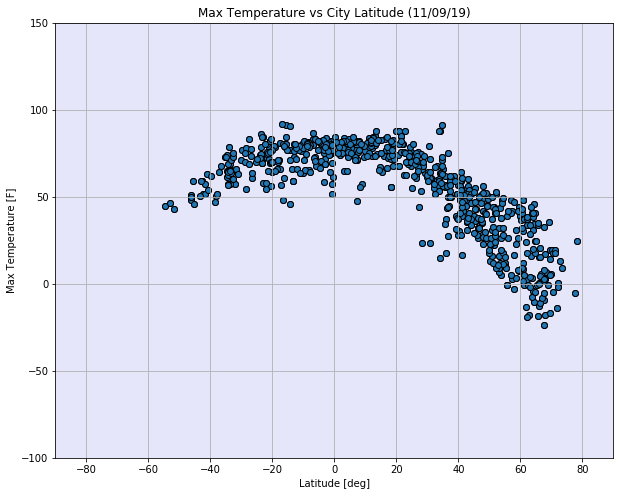

In [21]:

# Build a scatter plot 
plt.scatter(weather_df["Lat [deg]"], weather_df["Max Temp [F]"], marker="o", edgecolor='black')

# Incorporate the other graph properties
figtitle =f"Max Temperature vs City Latitude ({now_date})"
plt.title(figtitle)
plt.ylabel("Max Temperature [F]")
plt.xlabel("Latitude [deg]")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(-100,150)

# Save the figure
plt.savefig("MaxTemp_vs_Lat.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

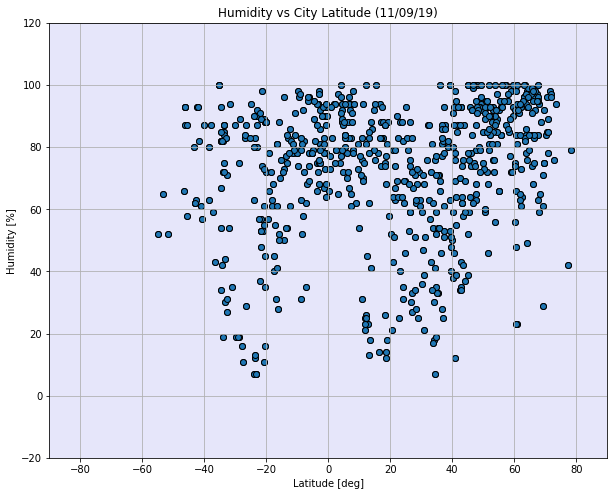

In [22]:
# Build a scatter plot 
plt.scatter(weather_df["Lat [deg]"], weather_df["Humidity [%]"], marker="o", edgecolor='black')

# Incorporate the other graph properties
figtitle =f"Humidity vs City Latitude ({now_date})"
plt.title(figtitle)

plt.ylabel("Humidity [%]")
plt.xlabel("Latitude [deg]")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(-20,120)

# Save the figure
plt.savefig("Humidity_vs_Lat.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

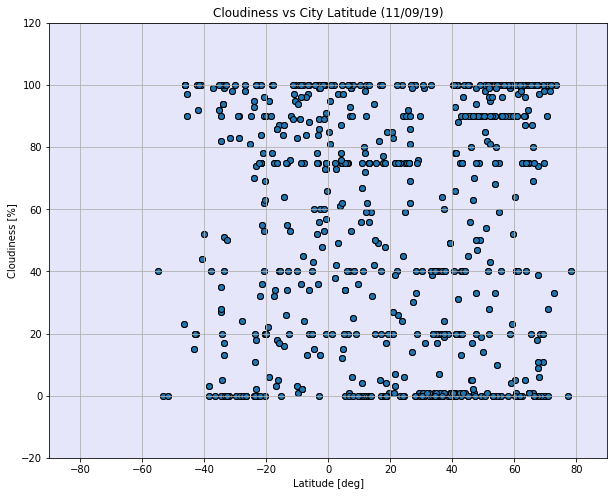

In [23]:
# Build a scatter plot 
plt.scatter(weather_df["Lat [deg]"], weather_df["Cloudiness [%]"], marker="o", edgecolor='black')

# Incorporate the other graph properties
figtitle =f"Cloudiness vs City Latitude ({now_date})"
plt.title(figtitle)

plt.ylabel("Cloudiness [%]")
plt.xlabel("Latitude [deg]")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(-20,120)

# Save the figure
plt.savefig("Cloudiness_vs_Lat.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

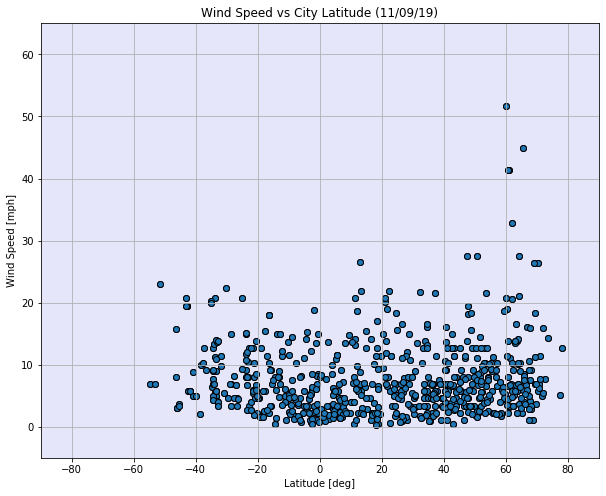

In [24]:
# Build a scatter plot 
plt.scatter(weather_df["Lat [deg]"], weather_df["Wind Speed [mph]"], marker="o", edgecolor='black')

# Incorporate the other graph properties
figtitle =f"Wind Speed vs City Latitude ({now_date})"
plt.title(figtitle)

plt.ylabel("Wind Speed [mph]")
plt.xlabel("Latitude [deg]")
plt.grid(True)
plt.xlim(-90,90)

minwind, maxwind = plt.ylim()
plt.ylim(-5,maxwind*1.20)

# Save the figure
plt.savefig("WindSpeed_vs_Lat.png")
# Show plot
plt.show()

## Latitude vs Longitude plot 
### (additional, not required plot)

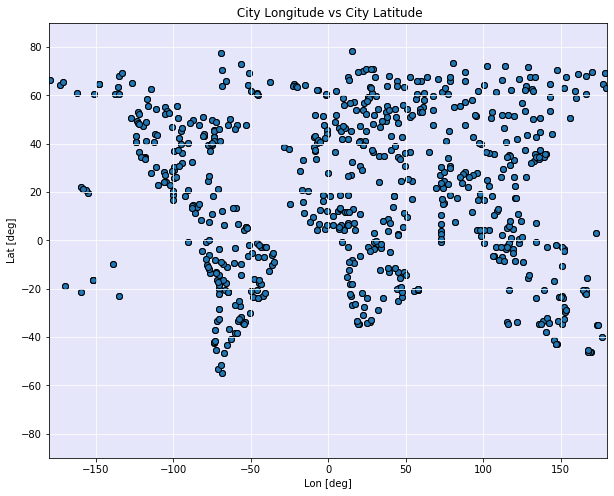

In [25]:
plt.scatter(weather_df["Lng [deg]"], weather_df["Lat [deg]"], marker="o", edgecolor='black')
# Incorporate the other graph properties
plt.title(" City Longitude vs City Latitude")

plt.ylabel("Lat [deg]")
plt.xlabel("Lon [deg]")
plt.grid(True, color='white')
plt.xlim(-180,180)
plt.ylim(-90,90)

# Save the figure
# plt.savefig("Lon_vs_Lat.png")
# Show plot
plt.show()